In [1]:
import fastbook

from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
# from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

from utils.all import *

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

curPath = getCurDir()

modelPath = getModelPath(curPath)

In [2]:
dataPath = getDatasetPath(curPath)

dataPath.ls(file_type='text')

(#3) [Path('/media/jimbeam/DATA/Project/unpackAI/assignment/Prudential Life Insurance Assessment/prudential-life-insurance-assessment/sample_submission.csv'),Path('/media/jimbeam/DATA/Project/unpackAI/assignment/Prudential Life Insurance Assessment/prudential-life-insurance-assessment/test.csv'),Path('/media/jimbeam/DATA/Project/unpackAI/assignment/Prudential Life Insurance Assessment/prudential-life-insurance-assessment/train.csv')]

In [3]:
df_all = pd.read_csv(dataPath/'train.csv', low_memory = False)
df_test = pd.read_csv(dataPath/'test.csv', low_memory = False)

df_all.columns

Index(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
       'Ins_Age', 'Ht',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=128)

In [4]:
dep_var = 'Response'

In [5]:
df_all.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,...,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,...,0,0,0,8
1,5,1,A1,26,...,0,0,0,4
2,6,1,E1,26,...,0,0,0,8
3,7,1,D4,10,...,0,0,0,8
4,8,1,D2,26,...,0,0,0,8


In [6]:
df_all.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,...,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,...,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,...,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,...,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,...,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,...,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,...,1.000000,1.000000,1.000000,8.000000


In [7]:
df_all.shape

(59381, 128)

In [8]:
df_all.dtypes

Id                      int64
Product_Info_1          int64
Product_Info_2         object
Product_Info_3          int64
Product_Info_4        float64
                       ...   
Medical_Keyword_45      int64
Medical_Keyword_46      int64
Medical_Keyword_47      int64
Medical_Keyword_48      int64
Response                int64
Length: 128, dtype: object

In [9]:
procs = [Categorify, FillMissing]

condition = (df_all.Id<=70000)
train_idx = np.where( condition)[0]
valid_idx = np.where(~condition)[0]

splits = (list(train_idx),list(valid_idx))

In [10]:
cont,cat = cont_cat_split(df_all, 1, dep_var=dep_var)

In [11]:
to = TabularPandas(df_all, procs, cat, cont, y_names = dep_var, splits = splits)

len(to.train), len(to.valid)

(52577, 6804)

In [12]:
to.show(3)

,Product_Info_2,Employment_Info_1_na,Employment_Info_4_na,Employment_Info_6_na,Insurance_History_5_na,Family_Hist_2_na,Family_Hist_3_na,Family_Hist_4_na,Family_Hist_5_na,Medical_History_1_na,Medical_History_10_na,Medical_History_15_na,Medical_History_24_na,Medical_History_32_na,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,D3,False,False,True,False,True,False,True,False,False,True,False,True,True,2,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,0.2500,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,0.463768,0.598039,0.422535,0.526786,4.0,112,2,1,1,3,2,2,1,193.5,3,2,3,3,240.0,3,3,1,1,2,1,2,3,8.0,1,3,3,1,3,2,3,0.0,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,A1,False,False,False,False,False,True,False,True,False,True,False,True,True,5,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,0.519608,0.084507,0.508929,5.0,412,2,1,1,3,2,2,1,193.5,3,2,3,3,0.0,1,3,1,1,2,1,2,3,8.0,1,3,3,1,3,2,3,0.0,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,E1,False,False,False,True,False,True,False,True,False,True,True,True,True,6,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,0.000973,3,2,3,3,0.304348,0.519608,0.225352,0.508929,10.0,3,2,2,1,3,2,2,2,193.5,3,2,3,3,116.0,1,3,1,1,2,1,2,3,8.0,2,2,3,1,3,2,3,0.0,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [13]:
save_pickle(modelPath/'to.pkl',to)

# Decision Tree

In [14]:
to = load_pickle(modelPath/'to.pkl')

dep_var = 'Response'

In [15]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [16]:
m = DecisionTreeRegressor(max_leaf_nodes=24)
m.fit(xs, y);

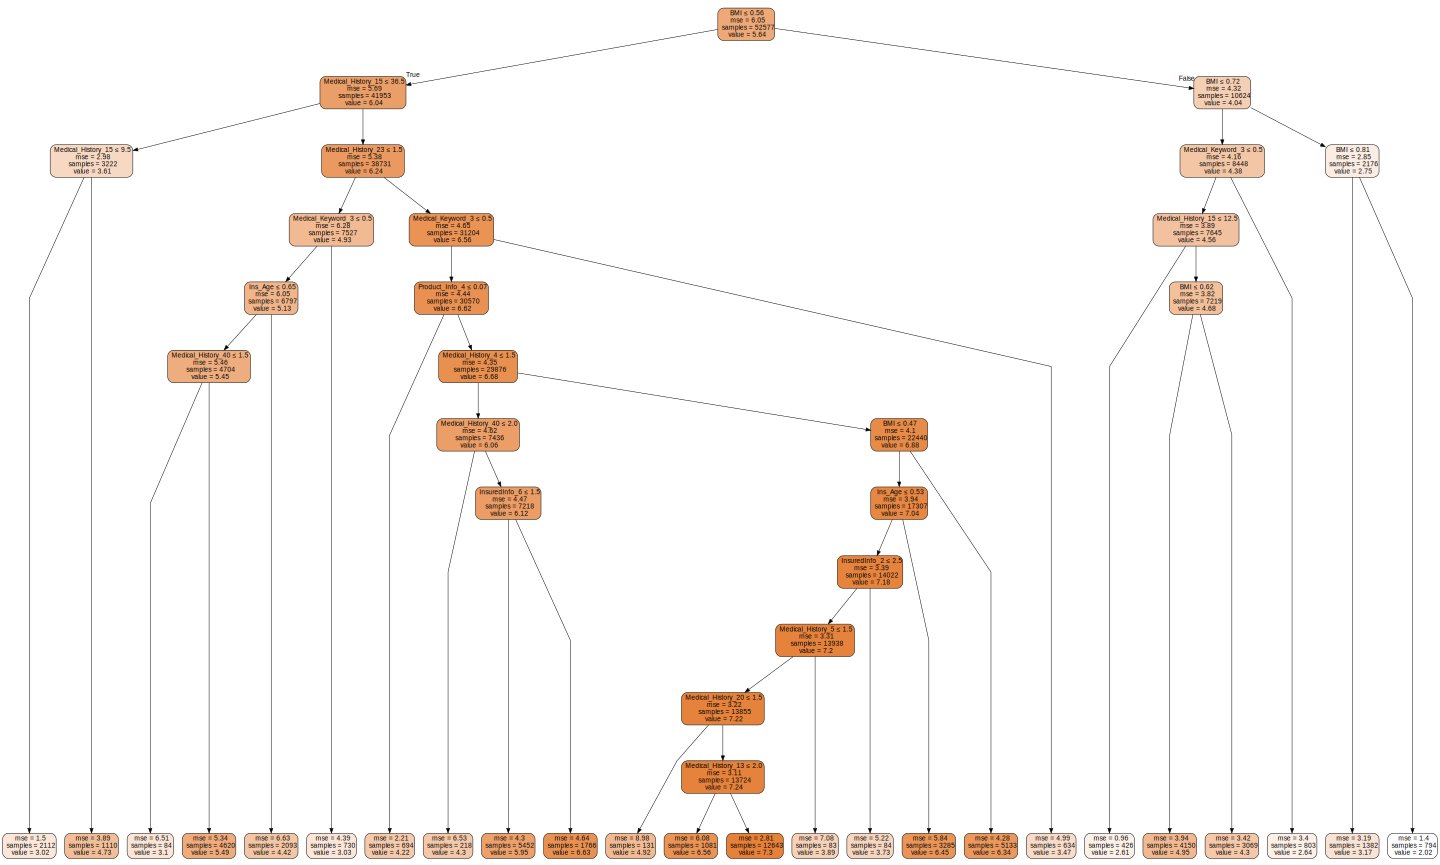

In [17]:
draw_tree(m, xs, size=20, leaves_parallel=True, precision=2)

/home/jimbeam/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jimbeam/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


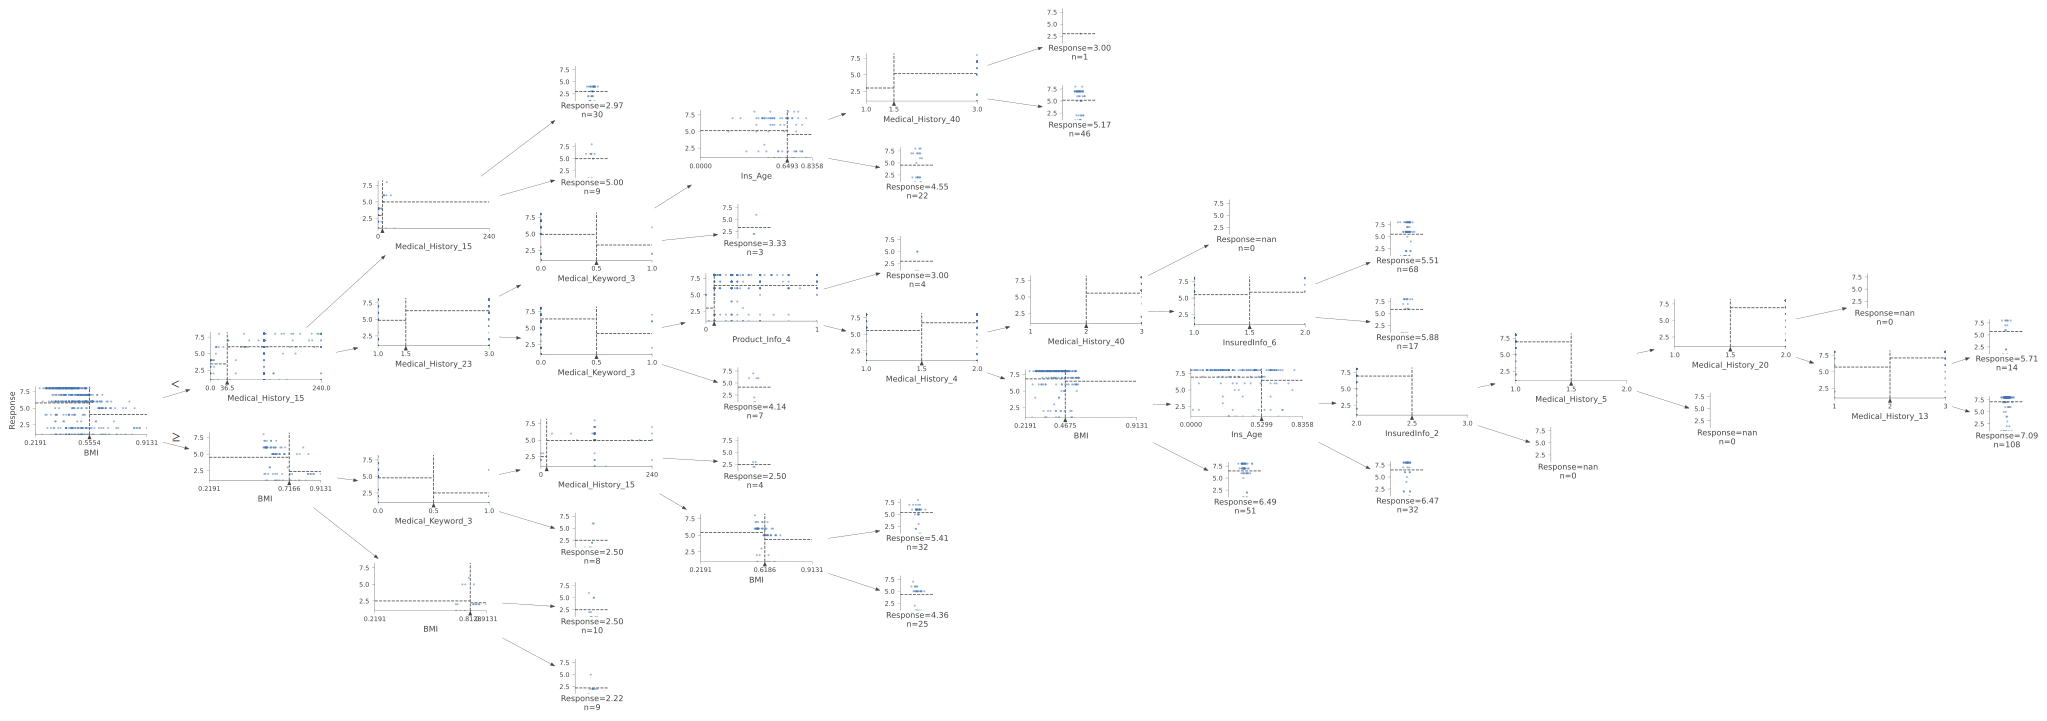

In [18]:
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

In [19]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(1.991559, 1.966038)

In [20]:
m = DecisionTreeRegressor(min_samples_leaf=56)
m.fit(xs, y);

In [21]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(1.840354, 1.958089)

In [22]:
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(1.840442, 1.958734)

# Random Forest

In [23]:
m = rf(xs, y, max_samples=52577)

In [24]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(1.299441, 1.881165)

In [25]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

In [26]:
r_mse(preds.mean(0), valid_y)

1.881165

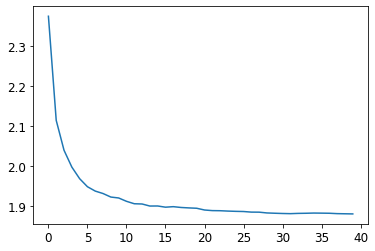

In [27]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)]);

In [28]:
r_mse(m.oob_prediction_, y)

1.903596

In [29]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
24,BMI,0.161919
65,Medical_History_15,0.093178
23,Wt,0.062367
73,Medical_History_23,0.059811
94,Medical_Keyword_3,0.050898
17,Product_Info_4,0.043083
21,Ins_Age,0.042517
14,Id,0.032311
25,Employment_Info_1,0.027106
54,Medical_History_4,0.026786


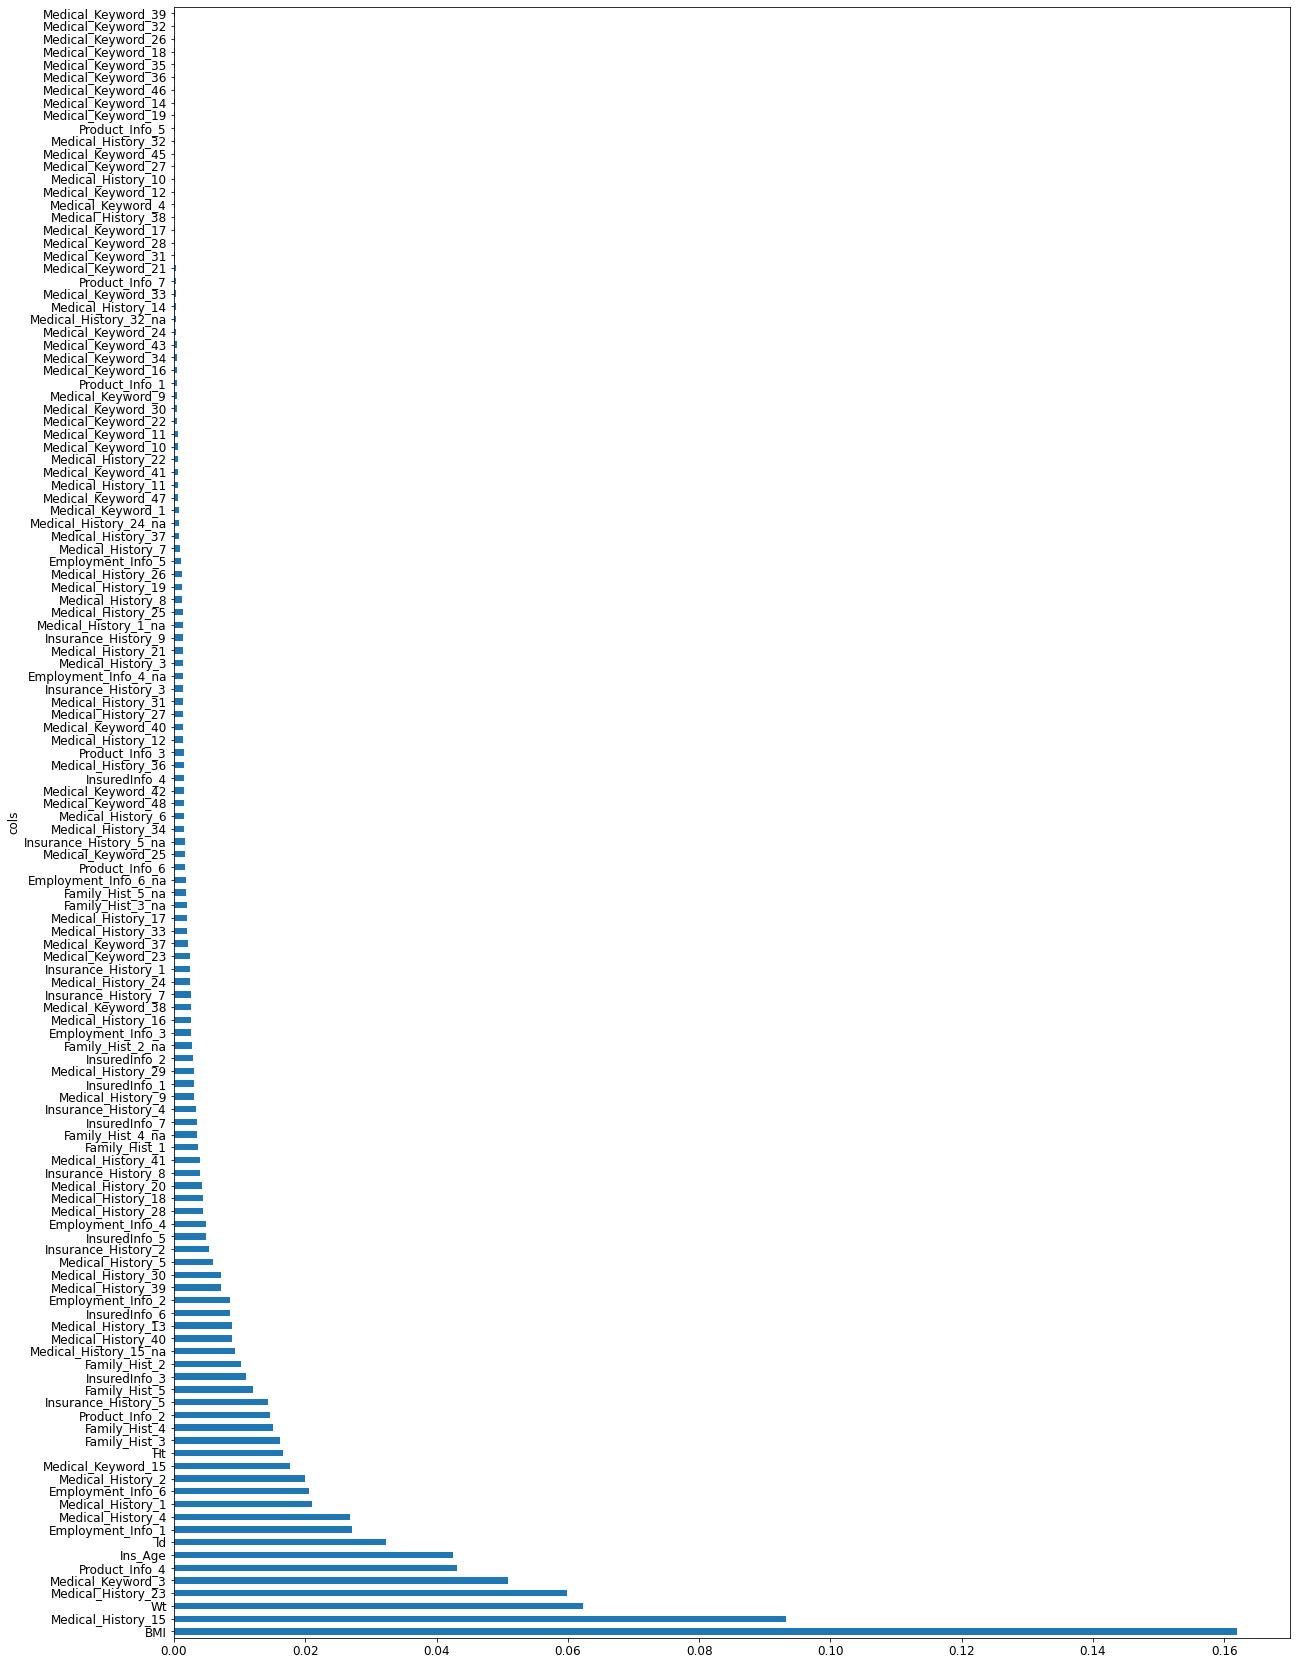

In [30]:
plot_fi(fi[:128], 20, 30);

In [31]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

31

In [32]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, max_samples=52577)

m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(1.344247, 1.913488)

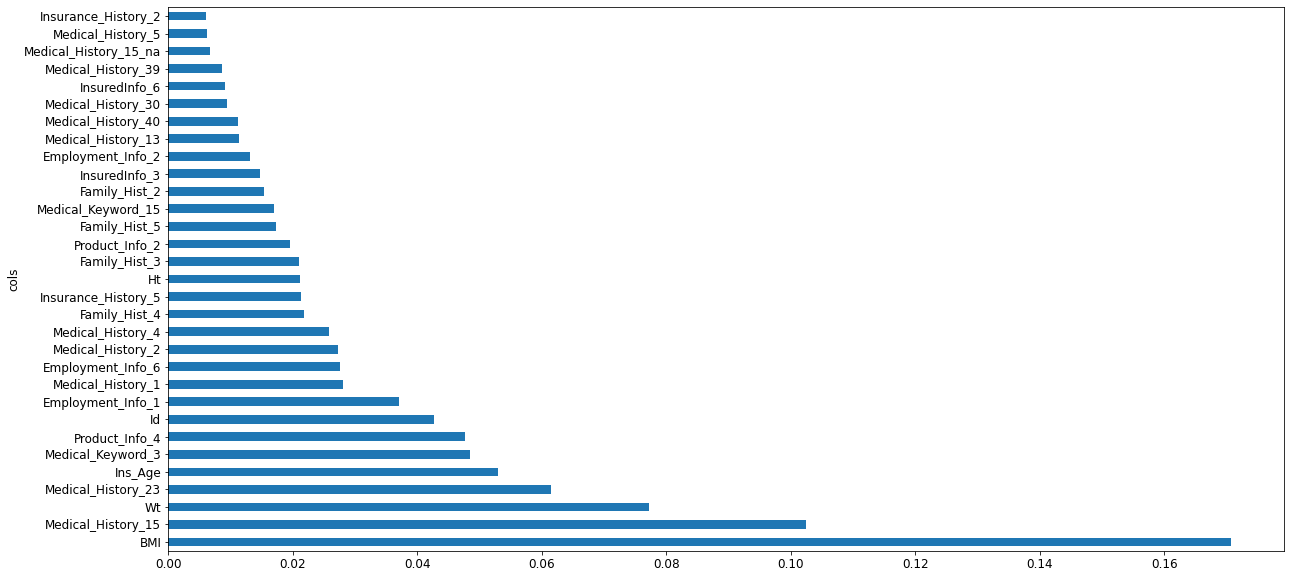

In [33]:
plot_fi(rf_feat_importance(m, xs_imp), 20, 10);

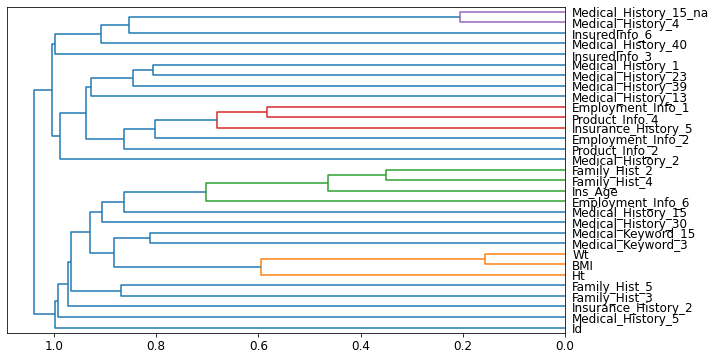

In [34]:
cluster_columns(xs_imp)

In [35]:
get_oob(xs_imp, y, 52577)

0.3842243738432253

In [36]:
save_pickle(modelPath/'xs_imp.pkl', xs_imp)
save_pickle(modelPath/'valid_xs_imp.pkl', valid_xs_imp)

# Train again

In [37]:
xs_final = load_pickle(modelPath/'xs_imp.pkl')
valid_xs_final = load_pickle(modelPath/'valid_xs_imp.pkl')

In [38]:
m = rf(xs_final, y, max_samples = 52577)
m_rmse(m, xs_final, y), m_rmse(m, valid_xs_final, valid_y)

(1.347321, 1.922591)

# Neural Network

In [39]:
procs_nn = [Categorify, FillMissing, Normalize]
df_all['Product_Info_2'] = df_all['Product_Info_2'].astype('category') # NEW
to_nn = TabularPandas(df_all, procs_nn, cat, cont,
                      splits=splits, y_names=dep_var)

In [40]:
dls = to_nn.dataloaders(1024)

y = to_nn.train.y
y.min(),y.max()

(1, 8)

In [41]:
learn = tabular_learner(dls, y_range=(8,12), layers=[500,250],
                        n_out=1, loss_func=F.mse_loss)

In [42]:
learn.lr_find()

RuntimeError: Found dtype Char but expected Float